In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fun

In [14]:
chem_df = pd.read_csv("data.csv")
display(chem_df)

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0960,0,-0.0478,-0.0840,2,0.0000,-0.0739,-0.2315,1.5660,-0.1133,...,2.5690,12.0174,0.1648,0.9710,0.0049,1,0.0,-0.0952,0.00,NonToxic
167,-0.0064,1,-0.1222,0.0013,1,0.0000,-0.1873,-0.2181,5.5404,-0.0757,...,10.7860,6.4871,0.1805,1.2298,0.0127,1,0.0,-0.0860,0.00,NonToxic
168,0.0096,2,-0.1846,0.0058,1,0.0000,-0.1293,-0.0979,5.3976,0.0409,...,4.9930,19.2864,0.2089,1.1245,0.0093,1,0.0,-0.0927,0.00,NonToxic
169,-0.0736,2,-0.1267,-0.0345,2,0.5346,-0.0361,0.0151,5.5190,-0.1025,...,10.7504,19.4989,0.1944,1.2256,0.0167,1,0.0,-0.1129,0.00,Toxic


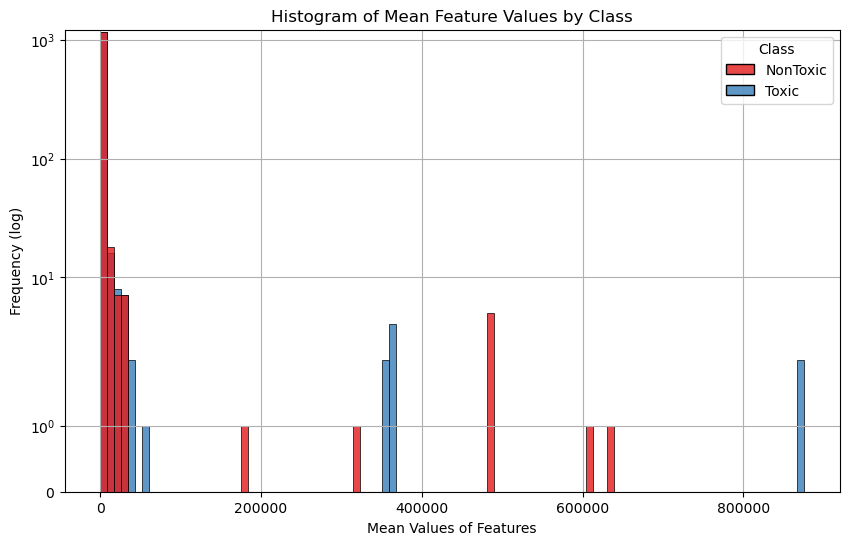

In [7]:
# Calculate the mean of each feature grouped by class
means_by_class = chem_df.groupby('Class').mean()
# Melt the DataFrame for easier plotting
means_melted = means_by_class.reset_index().melt(id_vars='Class', var_name='feature', value_name='mean_value')
# Plot the histogram of mean values for each class
plt.figure(figsize=(10, 6))
sns.histplot(data=means_melted, x='mean_value', hue='Class', bins=100, alpha=0.8, palette='Set1')
# Add labels and title
plt.xlabel('Mean Values of Features')
plt.ylabel('Frequency (log)')
plt.yscale('symlog')
plt.title('Histogram of Mean Feature Values by Class')
plt.grid(True)
plt.show()

In [8]:
data_quality = fun.check_data_quality(chem_df, 'Class')
display(data_quality)

No missing values found.

No duplicate rows found.

No non-numeric entries found.

No inconsistent decimal separators found.



{'Unique Values':   Target     Unique Entries
 0  Class  [NonToxic, Toxic]}

In [9]:
feature_stats = fun.calculate_feature_statistics(chem_df)
display(feature_stats)

,Feature,Mean,Range,IQR,MAD,Variance,SD,Number of Zeros,Percentage of Zeros
0,MATS3v,-0.031244,0.4526,0.07155,0.0368,0.004040,0.063559,0,0.000000
1,nHBint10,0.315789,4.0000,0.00000,0.0000,0.582043,0.762918,139,81.286550
2,MATS3s,-0.001001,0.4027,0.06500,0.0332,0.004087,0.063928,0,0.000000
3,MATS3p,-0.061501,0.4775,0.08245,0.0416,0.005313,0.072891,0,0.000000
4,nHBDon_Lipinski,0.994152,6.0000,2.00000,1.0000,1.229377,1.108773,73,42.690058
...,...,...,...,...,...,...,...,...,...
1198,ETA_EtaP_B,0.011316,0.0332,0.00635,0.0032,0.000030,0.005482,0,0.000000
1199,nT5Ring,1.467836,5.0000,1.00000,1.0000,1.026901,1.013361,32,18.713450
1200,SHdNH,0.004820,0.4292,0.00000,0.0000,0.001978,0.044475,169,98.830409
1201,ETA_dEpsilon_C,-0.085088,0.1954,0.03315,0.0168,0.000857,0.029273,0,0.000000


In [10]:
# Remove all features that contain more than 70% zeros
chem_df = chem_df.loc[:, (chem_df == 0).sum() <= len(chem_df)*0.7]

In [11]:
# Save the cleaned data
chem_df.to_csv('data_cleaned.csv', index=False)

To show the functions do work when there are errors in the dataset, we will introduce errors into the data manually and perform data cleaning and preprocessing

In [20]:
chem_df = pd.read_csv('data.csv')
display(chem_df)

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0960,0,-0.0478,-0.0840,2,0.0000,-0.0739,-0.2315,1.5660,-0.1133,...,2.5690,12.0174,0.1648,0.9710,0.0049,1,0.0,-0.0952,0.00,NonToxic
167,-0.0064,1,-0.1222,0.0013,1,0.0000,-0.1873,-0.2181,5.5404,-0.0757,...,10.7860,6.4871,0.1805,1.2298,0.0127,1,0.0,-0.0860,0.00,NonToxic
168,0.0096,2,-0.1846,0.0058,1,0.0000,-0.1293,-0.0979,5.3976,0.0409,...,4.9930,19.2864,0.2089,1.1245,0.0093,1,0.0,-0.0927,0.00,NonToxic
169,-0.0736,2,-0.1267,-0.0345,2,0.5346,-0.0361,0.0151,5.5190,-0.1025,...,10.7504,19.4989,0.1944,1.2256,0.0167,1,0.0,-0.1129,0.00,Toxic


In [26]:
chem_error = fun.corrupt_dataframe(chem_df)
display(chem_error)

AttributeError: module 'functions' has no attribute 'corrupt_dataframe'